# Module 1

In [1]:
import os
os.listdir('/kaggle/input/')

['genome7',
 'lambda-virus',
 'genome6',
 'genome3',
 'genome5',
 'chromosome1',
 'genome1',
 'genome2']

In [2]:
# Function for reading the genome from a fasta file

def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            if not line[0] == '>':
                genome += line.rstrip()
    return genome

genome = readGenome('/kaggle/input/lambda-virus/lambda_virus.fa')
genome[:100]

'GGGCGGCGACCTCGCGGGTTTTCGCTATTTATGAAAATTTTCCGGTTTAAGGCGTTTCCGTTCTTCTTCGTCATAACTTAATGTTTTTATTTAAAATACC'

In [3]:
def readFastq(filename):
    sequences = []
    qualities = []
    with open (filename) as fh:
        while True:
            fh.readline()
            seq = fh.readline().rstrip()
            fh.readline()
            qual = fh.readline().rstrip()
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities

seqs, quals = readFastq('/kaggle/input/genome1/SRR835775_1.first1000.fastq')

print(len(quals[0]))

print(quals[:5])

100
['???B1ADDD8??BB+C?B+:AA883CEE8?C3@DDD3)?D2;DC?8?=BAD=@C@(.6.6=A?=?@##################################', 'CCCFFFFFGHHGHJJJJJIJGIIJJJJJJJIJIJJJJJFJJFGIIIIH=CBFCF=CCEG)=>EHB2@@DEC>;;?=;(=?BBD?59?BA###########', '@@<DD?DDHHH<CBHII:CFGIGAGHIIG?CCGGE0BDHIIHIGICH8=FHGI=@EHGGGEEHH>);?CC@.;(=;?59,5<A599?CB>ABBCB><88A', '@CCFFDDFHHHDFHIJJCGGIJJHIIHJC?DHHIJ0?DGHI9BBFHICGGIGI=CDEGI=?AAEF7@?################################', '@<@FDFDDBBFHH@EBGGGEH@FFHE;EHIEGGBHG?)9?8BDGGBGGBCDGI=93=C6==C;CCD(?@>@#############################']


In [4]:

genome = readGenome('/kaggle/input/genome2/phix.fa')
genome[:100]

'GAGTTTTATCGCTTCCATGACGCAGAAGTTAACACTTTCGGATATTTCTGATGAGTCGAAAAATTATCTTGATAAAGCAGGAATTACTACTGCTTGTTTA'

In [5]:
phix_reads, _ = readFastq('/kaggle/input/genome3/ERR266411_1.first1000_2.fastq')
# print(phix_reads)

In [6]:
def reverseComplement(a):
    complement = {'A':'T', 'C':'G', 'G':'C', 'T':'A', 'N':'N'}
    t = ''
    for base in a:
        t = complement[base] + t
    return t

reverseComplement('AGCTT')

'AAGCT'

**Homework**

Implement a version of the naive exact matching algorithm that is strand-aware. That is, instead of looking only for occurrences of P in T, additionally look for occurrences of the reverse complement of P in T. If P is ACT, your function should find occurrences of both ACTand its reverse complement AGT in T.

If P and its reverse complement are identical (e.g. AACGTT), then a given match offset should be reported only once. So if your new function is called naive_with_rc, then the old naivefunction and your new naive_with_rc function should return the same results when P equals its reverse complement.

In [7]:
def naive_with_rc(p, t):
    occurences = []
    q =  reverseComplement(p)
    for i in range(len(t) - len(p) + 1):
        match1 = True
        match2 = True
        for j in range(len(p)):
            if not t[i+j] == p[j]:
                match1 = False
            if not t[i+j] == q[j]:
                match2 = False
            if not match1 | match2:
                break
        if match1 | match2:
            occurences.append(i)
    return occurences

**Tests for Homework**

In [8]:
# Matching the sequenced reads to the reference genome
numMatched = 0
n= 0
for r in phix_reads:
    r = r[:30] # taking only the first part of the reads to get more values
    matches = naive_with_rc(r, genome)
    n += 1
    if len(matches) > 0:
        numMatched += 1
        
print ('%d / %d reads matched' % (numMatched, n))

932 / 1000 reads matched


In [9]:
p = 'CCC'
ten_as = 'AAAAAAAAAA'
t = ten_as + 'CCC' + ten_as + 'GGG' + ten_as
occurrences = naive_with_rc(p, t)
print(occurrences)

[10, 23]


In [10]:
p = 'CGCG'
t = ten_as + 'CGCG' + ten_as + 'CGCG' + ten_as
occurrences = naive_with_rc(p, t)
print(occurrences)

[10, 24]


In [11]:
p = 'TTAA'
occurrences = naive_with_rc(p, genome)
print(len(occurrences))

35


In [12]:
phix_genome = readGenome('/kaggle/input/genome2/phix.fa')
occurrences = naive_with_rc('ATTA', phix_genome)
print('offset of leftmost occurrence: %d' % min(occurrences))
print('# occurrences: %d' % len(occurrences))

offset of leftmost occurrence: 62
# occurrences: 60


In [13]:
#Tests for Lambda virus genome

occurrences = naive_with_rc('AGTCGA', genome)
print('offset of leftmost occurrence: %d' % min(occurrences))
print('# occurrences: %d' % len(occurrences))


offset of leftmost occurrence: 53
# occurrences: 1


**Homework**

Implement a version of the naive exact matching algorithm that is strand-aware. That is, instead of looking only for occurrences of P in T, additionally look for occurrences of the reverse complement of P in T. If P is ACT, your function should find occurrences of both ACTand its reverse complement AGT in T.

If P and its reverse complement are identical (e.g. AACGTT), then a given match offset should be reported only once. So if your new function is called naive_with_rc, then the old naivefunction and your new naive_with_rc function should return the same results when P equals its reverse complement.

In [14]:
def naive_2mm(p, t):
    occurences = []
    for i in range(len(t) - len(p) + 1):
        match = True
        mismatch = 0
        for j in range(len(p)):
            if not t[i+j] == p[j]:
                mismatch += 1
                if mismatch > 2:
                    match = False
                    break
        if match:
            occurences.append(i)
    return occurences

**Tests**

In [15]:
p = 'CTGT'
ten_as = 'AAAAAAAAAA'
t = ten_as + 'CTGT' + ten_as + 'CTTT' + ten_as + 'CGGG' + ten_as
occurrences = naive_2mm(p, t)
print(occurrences)

[10, 24, 38]


In [16]:
phix_genome = readGenome('/kaggle/input/genome2/phix.fa')
occurrences = naive_2mm('GATTACA', phix_genome)
print('offset of leftmost occurrence: %d' % min(occurrences))
print('# occurrences: %d' % len(occurrences))

offset of leftmost occurrence: 10
# occurrences: 79


In [17]:
# Tests for Lambda virus genome

occurrences = naive_2mm('AGGAGGTT', genome)
print('offset of leftmost occurrence: %d' % min(occurrences))
print('# occurrences: %d' % len(occurrences))

offset of leftmost occurrence: 945
# occurrences: 42


**Homework**

Finally, download and parse the provided FASTQ file containing real DNA sequencing reads derived from a human:

 https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq

Note that the file has many reads in it and you should examine all of them together when answering this question.  The reads are taken from this study:

Ajay, S. S., Parker, S. C., Abaan, H. O., Fajardo, K. V. F., & Margulies, E. H. (2011). Accurate

and comprehensive sequencing of personal genomes. Genome research, 21(9), 1498-1505. 

This dataset has something wrong with it; one of the sequencing cycles is poor quality.

Report which sequencing cycle has the problem.  Remember that a sequencing cycle corresponds to a particular offset in all the reads. For example, if the leftmost read position seems to have a problem consistently across reads, report 0. If the fourth position from the left has the problem, report 3. Do whatever analysis you think is needed to identify the bad cycle.

In [18]:
mSeqs, mQuals = readFastq('/kaggle/input/genome5/ERR037900_1.first1000.fastq')

print(mQuals[:5])
# print(mSeqs[:10])

['HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHGFHHHFHFFHHHHHGHHFHEH@4#55554455HGFBF<@C>7EEF@FBEDDD<=C<E', 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHCHHHHEHHBA#C>@54455C/7=CGHEGEB;C############', 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHGHHHHHHHHHHHHHDHHHDEHHHHFGIHEHEGGGF4#45655366GIGEHAGBG################', 'HHHHHHHHHHHHHHHHHHHHHHHHHIHHHHHHHHHHHHHHHHHHHHHHIHHHHHIHFHHHIHHHHD#ECA54655GGIBH?BD@+BCBF?5A=::>8?##', 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHIHIHEHHIGHIFFHIIGF6#555:2=7=CB;?3CAACBAC2B###########']


In [19]:
# Function to convert ASCII symbols to quality value for the reads
def phred33ToQ(qual):
    return ord(qual) - 33

In [20]:
def createHist(qualities):
    hist = [0] * 50
    for qual in qualities:
        for phred in qual:
            q = phred33ToQ(phred)
            hist[q] += 1
    return hist

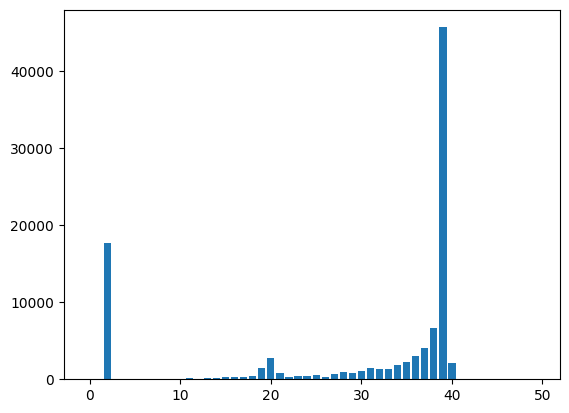

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
h = createHist(mQuals)
plt.bar(range(len(h)), h)
plt.show()

In [22]:
def findSeqCycle(quals):
    cycle = [0] * 100

    for qual in quals:
        for i in range(len(qual)):
            if qual[i] == '#':
                cycle[i] += 1
    return cycle

cycle = findSeqCycle(mQuals)
print(cycle)
print('cycle with poorest quality: %d' % cycle.index(max(cycle)))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 5, 5, 5, 6, 10, 13, 13, 13, 14, 19, 23, 25, 28, 29, 34, 49, 50, 60, 56, 64, 86, 90, 93, 97, 106, 142, 144, 152, 156, 184, 284, 919, 287, 290, 293, 303, 303, 303, 305, 309, 313, 314, 318, 329, 346, 390, 392, 398, 409, 431, 473, 484, 497, 512, 534, 572, 576, 583, 591, 613, 644, 649, 654, 661, 670]
cycle with poorest quality: 66


# Module 2

In [23]:
import string

def z_array(s):
    """ Use Z algorithm (Gusfield theorem 1.4.1) to preprocess s """
    assert len(s) > 1
    z = [len(s)] + [0] * (len(s)-1)
    # Initial comparison of s[1:] with prefix
    for i in range(1, len(s)):
        if s[i] == s[i-1]:
            z[1] += 1
        else:
            break
    r, l = 0, 0
    if z[1] > 0:
        r, l = z[1], 1
    for k in range(2, len(s)):
        assert z[k] == 0
        if k > r:
            # Case 1
            for i in range(k, len(s)):
                if s[i] == s[i-k]:
                    z[k] += 1
                else:
                    break
            r, l = k + z[k] - 1, k
        else:
            # Case 2
            # Calculate length of beta
            nbeta = r - k + 1
            zkp = z[k - l]
            if nbeta > zkp:
                # Case 2a: Zkp wins
                z[k] = zkp
            else:
                # Case 2b: Compare characters just past r
                nmatch = 0
                for i in range(r+1, len(s)):
                    if s[i] == s[i - k]:
                        nmatch += 1
                    else:
                        break
                l, r = k, r + nmatch
                z[k] = r - k + 1
    return z


def n_array(s):
    """ Compile the N array (Gusfield theorem 2.2.2) from the Z array """
    return z_array(s[::-1])[::-1]


def big_l_prime_array(p, n):
    """ Compile L' array (Gusfield theorem 2.2.2) using p and N array.
        L'[i] = largest index j less than n such that N[j] = |P[i:]| """
    lp = [0] * len(p)
    for j in range(len(p)-1):
        i = len(p) - n[j]
        if i < len(p):
            lp[i] = j + 1
    return lp


def big_l_array(p, lp):
    """ Compile L array (Gusfield theorem 2.2.2) using p and L' array.
        L[i] = largest index j less than n such that N[j] >= |P[i:]| """
    l = [0] * len(p)
    l[1] = lp[1]
    for i in range(2, len(p)):
        l[i] = max(l[i-1], lp[i])
    return l


def small_l_prime_array(n):
    """ Compile lp' array (Gusfield theorem 2.2.4) using N array. """
    small_lp = [0] * len(n)
    for i in range(len(n)):
        if n[i] == i+1:  # prefix matching a suffix
            small_lp[len(n)-i-1] = i+1
    for i in range(len(n)-2, -1, -1):  # "smear" them out to the left
        if small_lp[i] == 0:
            small_lp[i] = small_lp[i+1]
    return small_lp


def good_suffix_table(p):
    """ Return tables needed to apply good suffix rule. """
    n = n_array(p)
    lp = big_l_prime_array(p, n)
    return lp, big_l_array(p, lp), small_l_prime_array(n)


def good_suffix_mismatch(i, big_l_prime, small_l_prime):
    """ Given a mismatch at offset i, and given L/L' and l' arrays,
        return amount to shift as determined by good suffix rule. """
    length = len(big_l_prime)
    assert i < length
    if i == length - 1:
        return 0
    i += 1  # i points to leftmost matching position of P
    if big_l_prime[i] > 0:
        return length - big_l_prime[i]
    return length - small_l_prime[i]


def good_suffix_match(small_l_prime):
    """ Given a full match of P to T, return amount to shift as
        determined by good suffix rule. """
    return len(small_l_prime) - small_l_prime[1]


def dense_bad_char_tab(p, amap):
    """ Given pattern string and list with ordered alphabet characters, create
        and return a dense bad character table.  Table is indexed by offset
        then by character. """
    tab = []
    nxt = [0] * len(amap)
    for i in range(0, len(p)):
        c = p[i]
        assert c in amap
        tab.append(nxt[:])
        nxt[amap[c]] = i+1
    return tab


class BoyerMoore(object):
    """ Encapsulates pattern and associated Boyer-Moore preprocessing. """
    
    def __init__(self, p, alphabet='ACGT'):
        self.p = p
        self.alphabet = alphabet
        # Create map from alphabet characters to integers
        self.amap = {}
        for i in range(len(self.alphabet)):
            self.amap[self.alphabet[i]] = i
        # Make bad character rule table
        self.bad_char = dense_bad_char_tab(p, self.amap)
        # Create good suffix rule table
        _, self.big_l, self.small_l_prime = good_suffix_table(p)
    
    def bad_character_rule(self, i, c):
        """ Return # skips given by bad character rule at offset i """
        assert c in self.amap
        ci = self.amap[c]
        assert i > (self.bad_char[i][ci]-1)
        return i - (self.bad_char[i][ci]-1)
    
    def good_suffix_rule(self, i):
        """ Given a mismatch at offset i, return amount to shift
            as determined by (weak) good suffix rule. """
        length = len(self.big_l)
        assert i < length
        if i == length - 1:
            return 0
        i += 1  # i points to leftmost matching position of P
        if self.big_l[i] > 0:
            return length - self.big_l[i]
        return length - self.small_l_prime[i]
    
    def match_skip(self):
        """ Return amount to shift in case where P matches T """
        return len(self.small_l_prime) - self.small_l_prime[1]

In [24]:
def boyer_moore(p, p_bm, t):
    i = 0
    occurences = []
    while i < len(t) - len(p) + 1:
        shift = 1
        mismatched = False
        for j in range(len(p)-1, -1,-1):
            if not p[j] == t[i+j]:
                skip_bc = p_bm.bad_character_rule(j, t[i+j])
                skip_gs = p_bm.good_suffix_rule(j)
                shift = max(shift, skip_bc, skip_gs)
                mismatched = True
                break
        if not mismatched:
            occurences.append(i)
            skip_gs = p_bm.match_skip()
            shift = max(shift, skip_gs)
        i += shift
        
    return occurences
                

In [25]:
# Module for building a k-mer index

import bisect

class Index(object):
    def __init__(self, t, k):
        self.k = k
        self.index = []
        for i in range(len(t) - k + 1):
            self.index.append((t[i:i+k], i))
        self.index.sort()
        
    def query(self, p):
        kmer = p[:self.k]
        i = bisect.bisect_left(self.index, (kmer, -1))
        hits = []
        while   i < len(self.index):
            if self.index[i][0] != kmer:
                break
            hits.append(self.index[i][1])
            i += 1
        return hits

In [26]:
def queryIndex(p, t, index):
    k = index.k
    offsets = []
    for i in index.query(p):
        if p[k:] == t[i+k: i+len(p)]:
            offsets.append(i)
    return offsets

In [27]:
#PigeonHole Principle

def approximate_match(p, t, n):
    
    segment_length = round(len(p) / (n+1))
    all_matches = set()
    for i in range(n+1):
        start = i*segment_length
        end = min((i+1)*segment_length, len(p))
        p_bm = BoyerMoore(p[start:end], alphabet='ACGT')
        matches = boyer_moore(p[start:end], p_bm, t)
        
        for m in matches:
            if m < start or m-start+len(p) > len(t):
                continue
                
            mismatches = 0
            for j in range(0, start):
                if not p[j] == t[m-start+j]:
                    mismatches +=1
                    if mismatches > n:
                        break
            
            for j in range(end, len(p)):
                if not p[j] == t[m-start+j]:
                    mismatches += 1
                    if mismatches > n:
                        break
                        
            if mismatches <= n:
                all_matches.add(m-start)
    return list(all_matches)

**Project**


Implement versions of the naive exact matching and Boyer-Moore algorithms that additionally count and return (a) the number of character comparisons performed and (b) the number of alignments tried. Roughly speaking, these measure how much work the two different algorithms are doing.

In [28]:
def naive_count(p, t):
    occurences = []
    num_alignments = 0
    num_character_comparisons = 0
    for i in range(len(t) - len(p) + 1):
        num_alignments += 1
        match = True
        for j in range(len(p)):
            num_character_comparisons +=1
            if not t[i+j] == p[j]:
                match = False
                break
        if match:
            occurences.append(i)
    return occurences, num_alignments, num_character_comparisons

**Test**

In [29]:
p = 'word'
t = 'there would have been a time for such a word'
occurrences, num_alignments, num_character_comparisons = naive_count(p, t)
print(occurrences, num_alignments, num_character_comparisons)

[40] 41 46


In [30]:
# p = 'GGCGCGGTGGCTCACGCCTGTAAT'
# t = chromosome
# occurrences, num_alignments, num_character_comparisons = naive_count(p, t)
# print(occurrences, num_alignments, num_character_comparisons)

In [31]:
p = 'needle'
t = 'needle need noodle needle'
occurrences, num_alignments, num_character_comparisons = naive_count(p, t)
print(occurrences, num_alignments, num_character_comparisons)

[0, 19] 20 35


In [32]:
def boyer_moore_count(p, p_bm, t):
    i = 0
    occurences = []
    num_alignments = 0
    num_character_comparisons = 0
    
    while i < len(t) - len(p) + 1:
        shift = 1
        mismatched = False
        num_alignments += 1
        for j in range(len(p)-1, -1,-1):
            num_character_comparisons +=1
            if not p[j] == t[i+j]:
                skip_bc = p_bm.bad_character_rule(j, t[i+j])
                skip_gs = p_bm.good_suffix_rule(j)
                shift = max(shift, skip_bc, skip_gs)
                mismatched = True
                break
        if not mismatched:
            occurences.append(i)
            skip_gs = p_bm.match_skip()
            shift = max(shift, skip_gs)
        i += shift
        
    return occurences, num_alignments, num_character_comparisons

In [33]:
p = 'word'
t = 'there would have been a time for such a word'
lowercase_alphabet = 'abcdefghijklmnopqrstuvwxyz '
p_bm = BoyerMoore(p, lowercase_alphabet)
occurrences, num_alignments, num_character_comparisons = boyer_moore_count(p, p_bm, t)
print(occurrences, num_alignments, num_character_comparisons)

[40] 12 15


In [34]:

p = 'needle'
t = 'needle need noodle needle'
p_bm = BoyerMoore(p, lowercase_alphabet)
occurrences, num_alignments, num_character_comparisons = boyer_moore_count(p, p_bm, t)
print(occurrences, num_alignments, num_character_comparisons)

[0, 19] 5 18


In [35]:
chromosome = readGenome('/kaggle/input/chromosome1/chr1.GRCh38.excerpt.fasta')

p = 'GGCGCGGTGGCTCACGCCTGTAATCCCAGCACTTTGGGAGGCCGAGG'
t = chromosome
p_bm = BoyerMoore(p, alphabet='ACGT')
occurrences, num_alignments, num_character_comparisons = boyer_moore_count(p, p_bm, t)
print(occurrences, num_alignments, num_character_comparisons)

[56922] 127974 165191


In [36]:
p = 'GGCGCGGTGGCTCACGCCTGTAATCCCAGCACTTTGGGAGGCCGAGG'
t = chromosome
occurrences, num_alignments, num_character_comparisons = naive_count(p, t)
print(occurrences, num_alignments, num_character_comparisons)

[56922] 799954 984143


**Project:**

Implement the pigeonhole principle using Index to find exact matches for the partitions. Assume P always has length 24, and that we are looking for approximate matches with up to 2 mismatches (substitutions). We will use an 8-mer index.

Write a function that, given a length-24 pattern P and given an Index object built on 8-mers, finds all approximate occurrences of P within T with up to 2 mismatches. Insertions and deletions are not allowed. Don't consider any reverse complements.

How many times does the string  GGCGCGGTGGCTCACGCCTGTAAT, which is derived from a human Alu sequence, occur with up to 2 substitutions in the excerpt of human chromosome 1?  (Don't consider reverse complements here.)

Hint 1: Multiple index hits might direct you to the same match multiple times, but be careful not to count a match more than once.

Hint 2: You can check your work by comparing the output of your new function to that of the naive_2mm function implemented in the previous module.

In [37]:

def approximate_match_index(p, t, index):
    segment_length = round(len(p) / 3)
    all_matches = set()
    total_index_hits = 0 
    for i in range(3):
        start = i * segment_length
        end = min((i + 1) * segment_length, len(p))
        matches = index.query(p[start:end])
        total_index_hits += len(matches)
#         print (matches)
        for m in matches:
            if m < start or m - start + len(p) > len(t):
                continue
            mismatches = 0
            for j in range(start):
                if not p[j] == t[m - start + j]:
                    mismatches += 1
                    if mismatches > 2:
                        break
            for j in range(end, len(p)):
                if not p[j] == t[m - start + j]:
                    mismatches += 1
                    if mismatches > 2:
                        break
            if mismatches <= 2:
                all_matches.add(m - start)
    return list(all_matches), total_index_hits

# index = Index(t, 2)
# print(queryIndex(p, t, index))

p = 'GGCGCGGTGGCTCACGCCTGTAAT'
t = chromosome
index = Index(t, 8)

# p = 'GGCGCGGTGGCTCACGCCTGTAAT'
# t = 'GGCGCGGTGGCTCACGCCTGTAAGGCGCGGTGGCTCACGCCTGTAATCCCAGCACTTTGGGAGGCCGGGAGGTGGCGCGGTGGCTGGCACGCCGGTGTAATGGCGCGGTGGCTCACGCCTGTAATGGCGCGGTGGGGCTCACGCCTGTAATGGCGCGGTGGCTCACGCCTGTAGGATGGCGCGGTGGCTCACGCCTGTAATGGGGCGCGGTGGCTCACGCCTGTAATGGCGCGGTGGCTCACGCCTGTAATGGCGCGGTGGCTCACGCCTGTAGGCGCGGTGGCTCACGCCTGTAATCCCAGCACTTTGGGAGGCCGAGGAT'

print(approximate_match_index(p, t, index))
# print(len(approximate_match_index(p, t, index)))

([273669, 681737, 717706, 262042, 635931, 84641, 160162, 724927, 657496, 160729, 56922, 191452, 551134, 747359, 421221, 147558, 364263, 465647, 429299], 90)


In [38]:
def naive_2mm(p, t):
    occurences = []
    for i in range(len(t) - len(p) + 1):
        match = True
        mismatch = 0
        for j in range(len(p)):
            if not t[i+j] == p[j]:
                mismatch += 1
                if mismatch > 2:
                    match = False
                    break
        if match:
            occurences.append(i)
    return occurences

def naive(p, t):
    total_index_hits = 0  # Initialize total index hits counter
    occurrences = []
    for i in range(len(t) - len(p) + 1):
        match = True
        for j in range(len(p)):
            if not t[i+j] == p[j]:
                match = False
                break
        if match:
            occurrences.append(i)
        total_index_hits += 1  # Increment total index hits for each iteration
    return occurrences, total_index_hits

occurrences = naive_2mm(p, t)
print(len(occurrences))
print(index)

19


In [39]:
import bisect
   
class SubseqIndex(object):
    """ Holds a subsequence index for a text T """
    
    def __init__(self, t, k, ival):
        """ Create index from all subsequences consisting of k characters
            spaced ival positions apart.  E.g., SubseqIndex("ATAT", 2, 2)
            extracts ("AA", 0) and ("TT", 1). """
        self.k = k  # num characters per subsequence extracted
        self.ival = ival  # space between them; 1=adjacent, 2=every other, etc
        self.index = []
        self.span = 1 + ival * (k - 1)
        for i in range(len(t) - self.span + 1):  # for each subseq
            self.index.append((t[i:i+self.span:ival], i))  # add (subseq, offset)
        self.index.sort()  # alphabetize by subseq
    
    def query(self, p):
        """ Return index hits for first subseq of p """
        subseq = p[:self.span:self.ival]  # query with first subseq
        i = bisect.bisect_left(self.index, (subseq, -1))  # binary search
        hits = []
        while i < len(self.index):  # collect matching index entries
            if self.index[i][0] != subseq:
                break
            hits.append(self.index[i][1])
            i += 1
        return hits


In [40]:
def approximate_match_subseq_index(p, t, index):
    all_matches = set()
    total_index_hits = 0
    
    # For each of the possible offsets (0, 1, 2), query using the subsequence starting at that offset.
    for i in range(3):
        # Query the index with the subsequence extracted from p starting at offset i.
        subseq_matches = index.query(p[i:])
        total_index_hits += len(subseq_matches)
        
        for m in subseq_matches:
            start = m - i
            # Check that the full pattern can be aligned within t.
            if start < 0 or start + len(p) > len(t):
                continue
            
            # Count mismatches for the full alignment of p with t starting at 'start'.
            mismatches = 0
            for j in range(len(p)):
                if p[j] != t[start + j]:
                    mismatches += 1
                    if mismatches > n:
                        break
            
            # If within allowed mismatches, record the alignment start.
            if mismatches <= n:
                all_matches.add(start)
    
    return list(all_matches), total_index_hits



# def approximate_match_subseq_index(p, t, index):
#     all_matches = set()
#     for i in range(3):
#         subseq_matches = index.query(p[i:])
#         # print('hello')
#         # print(subseq_matches)
        
#         for m in subseq_matches:
#             if m < i or m - i + len(p) > len(t):
#                 continue
#             mismatches = 0
#             for j in range(0, i):
#                 if not p[j] == t[m-i+j]:
#                     mismatches +=1
#                     if mismatches > n:
#                         break
            
#             for j in range(len(p)):
#                 if not p[j] == t[m-i+j]:
#                     mismatches += 1
#                     if mismatches > n:
#                         break
                        
#             if mismatches <= n:
#                 all_matches.add(m-i)
#     return list(all_matches)


In [41]:
t = 'to-morrow and to-morrow and to-morrow creeps in this petty pace'
p = 'to-morrow and to-morrow '

subseq_ind = SubseqIndex(t, 8, 3)
occurrences, num_index_hits = approximate_match_subseq_index(p, t, subseq_ind)
print(occurrences)
print(num_index_hits)

[0, 14]
6


In [42]:
p = 'GGCGCGGTGGCTCACGCCTGTAAT'
t = chromosome

subseq_ind = SubseqIndex(t, 8, 3)
occurrences, num_index_hits = approximate_match_subseq_index(p, t, subseq_ind)
print(occurrences)
print(num_index_hits)

[712449, 651523, 558456, 273669, 349189, 681737, 717706, 658702, 794642, 551827, 83863, 579737, 262042, 635931, 471966, 262174, 67486, 84641, 596898, 160162, 151718, 84775, 745640, 100011, 322735, 479030, 199607, 472634, 489019, 454332, 719418, 724927, 719557, 108110, 707151, 766419, 657496, 160729, 56922, 23003, 191452, 704731, 551134, 747359, 366818, 421221, 147558, 364263, 137574, 421354, 465647, 783346, 429299, 141046, 124024, 746620, 22397, 32639]
79


In [43]:
!wget http://www.gutenberg.org/ebooks/1110.txt.utf-8


--2025-03-19 22:50:26--  http://www.gutenberg.org/ebooks/1110.txt.utf-8
Resolving www.gutenberg.org (www.gutenberg.org)... 152.19.134.47, 2610:28:3090:3000:0:bad:cafe:47
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.gutenberg.org/ebooks/1110.txt.utf-8 [following]
--2025-03-19 22:50:26--  https://www.gutenberg.org/ebooks/1110.txt.utf-8
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: http://www.gutenberg.org/cache/epub/1110/pg1110.txt [following]
--2025-03-19 22:50:26--  http://www.gutenberg.org/cache/epub/1110/pg1110.txt
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.gutenberg.org/cache/epub/1110/pg1110.txt [following]
--2025-03-19 22:50:26--  https://www.gutenberg.org/cache/e

In [44]:
t = open('1110.txt.utf-8').read()
p = 'English measure backward'
subseq_ind = SubseqIndex(t, 8, 3)
occurrences, num_index_hits = approximate_match_subseq_index(p, t, subseq_ind)
print(occurrences)
print(num_index_hits)

[110320]
3


In [45]:
[110320]
3


3

# Week 3

In [46]:
def editDistRecursive(x,y):
    # This implementation is very slow
    if len(x) == 0:
        return len(y)
    elif len(y) == 0:
        return len(x)
    else:
        distHor = editDistRecursive(x[:-1], y) + 1
        distVer = editDistRecursive(x, y[:-1]) + 1
        if x[-1] == y[-1]:
            distDiag = editDistRecursive(x[:-1], y[:-1])
        else:
            distDiag = editDistRecursive(x[:-1], y[:-1]) + 1

        return min(distHor, distVer, distDiag)

In [47]:
def editDistance(x,y):
    D = []
    for i in range (len(x)+1):
        D.append([0] * (len(y)+1))

    for i in range(len(x)+1):
        D[i][0] = i
    for i in range(len(y)+1):
        D[0][i] = i

    for i in range(1, len(x)+1):
        for j in range(1, len(y)+1):
            distHor = D[i][j-1] + 1
            distVer = D[i-1][j] + 1
            if x[i-1] == y[j-1]:
                distDiag = D[i-1][j-1]
            else:
                distDiag = D[i-1][j-1] + 1

            D[i][j] = min(distHor, distVer, distDiag)

    return D[-1][-1]
    

In [48]:
%%time
x = 'shake spea'
y = 'Shakespear'

print(editDistRecursive(x,y))

3
CPU times: user 4.51 s, sys: 3.61 ms, total: 4.52 s
Wall time: 4.52 s


In [49]:
%%time
x = 'shake spea'
y = 'Shakespear'

print(editDistance(x,y))

3
CPU times: user 159 µs, sys: 0 ns, total: 159 µs
Wall time: 165 µs


In [50]:
alphabet = ['A', 'C', 'G', 'T']
score = [[0, 4, 2, 4, 8],
        [4, 0, 4, 2, 8],
        [2, 4, 0, 4, 8],
        [4, 2, 4, 0, 8],
        [8, 8, 8, 8, 8]]

In [51]:
def globalAlignment(x,y):
    D = []
    for i in range (len(x)+1):
        D.append([0] * (len(y)+1))

    for i in range(1, len(x)+1):
        D[i][0] = D[i-1][0] + score[alphabet.index(x[i-1])][-1]
    for i in range(1, len(y)+1):
        D[0][i] = D[0][i-1] + score[-1][alphabet.index(y[i-1])]

    for i in range(1, len(x)+1):
        for j in range(1, len(y)+1):
            distHor = D[i][j-1] + score[-1][alphabet.index(y[j-1])]
            distVer = D[i-1][j] + score[alphabet.index(x[i-1])][-1]
            if x[i-1] == y[j-1]:
                distDiag = D[i-1][j-1] 
            else:
                distDiag = D[i-1][j-1] + score[alphabet.index(x[i-1])][alphabet.index(y[j-1])]                       
                                                                                                                                                                                 
            D[i][j] = min(distHor, distVer, distDiag)

    return D[-1][-1]
    

In [52]:
x = 'TACCAGATTCGA'
y = 'TACCAAATTGA'
globalAlignment(x,y)

10

In [53]:
def overlap(a, b, min_length=3):
    start = 0 # start all the way at the left

    while True:
        start = a.find(b[:min_length], start) # look for b's suffix in a
        if start == -1: # no more occurences to right
            return 0
        # found occurence; check for full suffix/prefix match
        if b.startswith(a[start:]):
            return len(a) - start
        start += 1 # move just past the previous match
        

In [54]:
overlap('TTACGTA', 'CTACCGTA')

0

In [55]:
from itertools import permutations

def naive_overlap_map(reads, k):
    olaps = {}
    for a,b  in permutations(reads, 2):
        olen = overlap(a, b, min_length = k)
        if olen > 0:
            olaps[(a,b)] = olen
    return olaps

In [56]:
reads = ['ACGGATGATC', 'GATCAAGT', 'TTCACGGA']
print(naive_overlap_map(reads, 3))

{('ACGGATGATC', 'GATCAAGT'): 4, ('TTCACGGA', 'ACGGATGATC'): 5}


**Project:**

Adapt the editDistance function we saw in practical to answer questions 1 and 2 below. Your function should take arguments p (pattern), t (text) and should return the edit distance of the match between P and T with the fewest edits.

Hint: In the "A new solution to approximate matching" video we saw that the best approximate match of P = GCGTATGC within T = TATTGGCTATACGGTT had 2 edits. You can use this and other small examples to double-check that your function is working.



In [57]:
def editDistance(p, t):
    # Create distance matrix
    D = []
    for i in range(len(x)+1):
        D.append([0]*(len(y)+1))
    # Initialize first row and column of matrix
    for i in range(len(x)+1):
        D[i][0] = i
    for i in range(len(y)+1):
        D[0][i] = 0 # initialize all the first row as zeros
    # Fill in the rest of the matrix
    for i in range(1, len(x)+1):
        for j in range(1, len(y)+1):
            distHor = D[i][j-1] + 1
            distVer = D[i-1][j] + 1
            if x[i-1] == y[j-1]:
                distDiag = D[i-1][j-1]
            else:
                distDiag = D[i-1][j-1] + 1
            D[i][j] = min(distHor, distVer, distDiag)
    # Get the edit distance with the best match
    return min(D[-1])


In [58]:
# x = 'GCTGATCGATCGTACG'
# y = chromosome

x = 'GATTTACCAGATTGAG'
y = chromosome

# x = 'shake spea'
# y = 'Shakespear'



print(editDistance(x,y))

2


**Project2** 

Say we are concerned only with overlaps that (a) are exact matches (no differences allowed), and (b) are at least k bases long. To make an overlap graph, we could call overlap(a, b, min_length=k) on every possible pair of reads from the dataset. Unfortunately, that will be very slow!

Consider this: Say we are using k=6, and we have a read a whose length-6 suffix is GTCCTA. Say GTCCTA does not occur in any other read in the dataset. In other words, the 6-mer GTCCTA occurs at the end of read a and nowhere else. It follows that a's suffix cannot possibly overlap the prefix of any other read by 6 or more characters.

Put another way, if we want to find the overlaps involving a suffix of read a and a prefix of some other read, we can ignore any reads that don't contain the length-k suffix of a. This is good news because it can save us a lot of work!

Here is a suggestion for how to implement this idea. You don't have to do it this way, but this might help you. Let every k-mer in the dataset have an associated Python set object, which starts out empty. We use a Python dictionary to associate each k-mer with its corresponding set. (1) For every k-mer in a read, we add the read to the set object corresponding to that k-mer. If our read is GATTA and k=3, we would add GATTA to the set objects for GAT, ATT, and TTA. We do this for every read so that, at the end, each set contains all reads containing the corresponding k-mer. (2) Now, for each read a, we find all overlaps involving a suffix of a. To do this, we take a's length-k suffix, find all reads containing that k-mer (obtained from the corresponding set) and call overlap(a, b, min_length=k) for each.

The most important point is that we do not call overlap(a, b, min_length=k) if b does not contain the length-k suffix of a.

Download and parse the read sequences from the provided Phi-X FASTQ file. We'll just use their base sequences, so you can ignore read names and base qualities. Also, no two reads in the FASTQ have the same sequence of bases. This makes things simpler.

https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR266411_1.for_asm.fastq

Next, find all pairs of reads with an exact suffix/prefix match of length at least 30. Don't overlap a read with itself; if a read has a suffix/prefix match to itself, ignore that match. Ignore reverse complements.

Hint 1: Your function should not take much more than 15 seconds to run on this 10,000-read dataset, and maybe much less than that. (Our solution takes about 3 seconds.) If your function is much slower, there is a problem somewhere.

Hint 2: Remember not to overlap a read with itself. If you do, your answers will be too high.

Hint 3: You can test your implementation by making up small examples, then checking that (a) your implementation runs quickly, and (b) you get the same answer as if you had simply called overlap(a, b, min_length=k) on every pair of reads. We also have provided a couple of examples you can check against.

Picture the overlap graph corresponding to the overlaps just calculated. How many edges are in the graph? In other words, how many distinct pairs of reads overlap?



In [59]:
def overlap(a, b, min_length=3):
    start = 0 # start all the way at the left

    while True:
        start = a.find(b[:min_length], start) # look for b's suffix in a
        if start == -1: # no more occurences to right
            return 0
        # found occurence; check for full suffix/prefix match
        if b.startswith(a[start:]):
            return len(a) - start
        start += 1 # move just past the previous match

In [60]:
from collections import defaultdict

def overlap_all_pairs(reads, k):
    olaps = {}
    kdict = defaultdict(set)
    nodes = set()
    for r in reads:
        for i in range(len(r) - k + 1):
            kdict[(r[i:i+k])].add(r)

    for a in reads:
        bset = kdict[a[-k:]]
        bset.discard(a)
        for b in bset:
            olen = overlap(a, b, min_length=k)
            if olen > 0:
                olaps[(a,b)] = olen
                nodes.add(a)
    return len(olaps), len(nodes)
    

In [61]:
reads, _ = readFastq('/kaggle/input/genome6/ERR266411_1.for_asm.fastq')

In [62]:
%%time
reads1 = ['CGTACG', 'TACGTA', 'GTACGT', 'ACGTAC', 'GTACGA', 'TACGAT']
reads2 = ['ABCDEFG', 'EFGHIJ', 'HIJABC']

print(overlap_all_pairs(reads, 30))

(904746, 7161)
CPU times: user 2.96 s, sys: 198 ms, total: 3.16 s
Wall time: 3.16 s


# Week 4

In [63]:
import itertools

def scs(ss):
    shortest_sup = None
    for ssperm in itertools.permutations(ss):
        sup = ssperm[0]
        for i in range(len(ss)-1):
            olen = overlap(ssperm[i], ssperm[i+1], min_length=1)
            sup += ssperm[i+1][olen:]
        if shortest_sup is None or len(sup) < len(shortest_sup):
            shortest_sup = sup
    return shortest_sup

def scs_list(ss):
    shortest_sup = None
    shortest_sup_list = []
    mini_len = 0
    for ssperm in itertools.permutations(ss):
        sup = ssperm[0]
        for i in range(len(ss)-1):
            olen = overlap(ssperm[i], ssperm[i+1], min_length=1)
            sup += ssperm[i+1][olen:]
        if shortest_sup is None or len(sup) <= len(shortest_sup):
            shortest_sup = sup
            mini_len = len(shortest_sup)
            shortest_sup_list.append(shortest_sup)
    
    return [str for str in shortest_sup_list if len(str) == mini_len]

In [64]:
samp = ["apple", "pleeees", "sherry"]
print(scs(samp))

appleeeesherry


In [65]:
samp1 = ['ABC', 'BCA', 'CAB']
samp2 = ['GAT', 'TAG', 'TCG', 'TGC', 'AAT', 'ATA']
samp3 = ['CCT', 'CTT', 'TGC', 'TGG', 'GAT', 'ATT']

print(scs(samp3))
print(len(scs(samp3)))
print(scs_list(samp3))
print(len(scs_list(samp3)))

CCTTGGATTGC
11
['CCTTGGATTGC', 'TGCCTTGGATT', 'TGGATTGCCTT', 'GATTGCCTTGG']
4


In [66]:
def pick_maximal_overlap(reads, k):
    reada, readb = None, None
    best_olen = 0
    for a,b in itertools.permutations(reads, 2):
        olen = overlap(a, b, min_length=k)
        if olen > best_olen:
            reada, readb = a, b
            best_olen = olen
    return reada, readb, best_olen


def greedy_scs(reads, k):
    read_a, read_b, olen = pick_maximal_overlap(reads, k)
    while olen > 0:
        reads.remove(read_a)
        reads.remove(read_b)
        reads.append(read_a + read_b[olen:])
        read_a, read_b, olen = pick_maximal_overlap(reads, k)
    return ''.join(reads)

In [67]:
def generate_kmer(st, k):
    kmers = set()
    for i in range(len(st) - k + 1):
        kmer = st[i:i+k]
        kmers.add(kmer)
    return kmers

In [68]:
print(generate_kmer('GCTGATCGATCGTACG', 4))

{'GATC', 'TCGA', 'CGTA', 'GCTG', 'GTAC', 'TACG', 'TGAT', 'ATCG', 'CGAT', 'CTGA', 'TCGT'}


In [69]:
sample = generate_kmer('a_long_long_long_time', 11)
print(greedy_scs(samp3, 30))

# print(scs(sample))
# experiment failed


CCTCTTTGCTGGGATATT


In [70]:
def de_bruijn_ize(st, k):
    my_edges = []
    my_nodes = set()
    for i in range(len(st) - k + 1):
        my_edges.append((st[i:i+k-1], st[i+1:i+k]))
        my_nodes.add(st[i:i+k-1])
        my_nodes.add(st[i+1:i+k])
    return my_nodes, my_edges

In [71]:
nodes, edges = de_bruijn_ize ('ACGCGTCG', 3)
print(nodes)
print(edges)

{'TC', 'GC', 'GT', 'CG', 'AC'}
[('AC', 'CG'), ('CG', 'GC'), ('GC', 'CG'), ('CG', 'GT'), ('GT', 'TC'), ('TC', 'CG')]


In [72]:
def visualize_de_bruijn(st, k):
    """ Visualize a directed multigraph using graphviz """
    nodes, edges = de_bruijn_ize(st, k)
    dot_str = 'digraph "DeBruijn graph" {\n'
    for node in nodes:
        dot_str += '  %s [label="%s"] ;\n' % (node, node)
    for src, dst in edges:
        dot_str += '  %s -> %s ;\n' % (src, dst)
    return dot_str + '}\n'

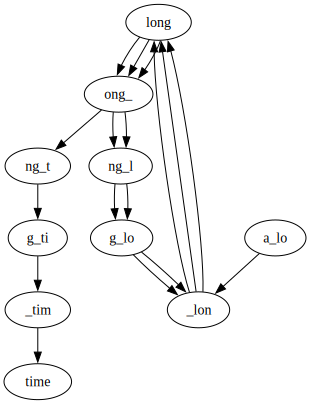

In [73]:
import graphviz
from IPython.display import display

display(graphviz.Source(visualize_de_bruijn('a_long_long_long_time', 5)))

**Project:**

All the reads are the same length (100 bases) and are exact copies of substrings from the forward strand of the virus genome (genome7 dataset).  You don't have to worry about sequencing errors, ploidy, or reads coming from the reverse strand.

Assemble these reads using one of the approaches discussed, such as greedy shortest common superstring.  Since there are many reads, you might consider ways to make the algorithm faster, such as the one discussed in the programming assignment in the previous module.

How many As are there in the full, assembled genome?

Hint: the virus genome you are assembling is exactly 15,894 bases long

How many Ts are there in the full, assembled genome from the previous question?




In [74]:
reads4, _ = readFastq('/kaggle/input/genome7/ads1_week4_reads.fq')

In [75]:
print(len(reads))

10000


In [76]:
genome = greedy_scs(reads4, 30)

In [77]:
print(len(genome))

15894


In [78]:
counta = genome.count('A')
print(counta)
countt = genome.count('T')
print(countt)

4633
3723


In [79]:
def overlap(a, b, min_length=3):
    start = 0 # start all the way at the left

    while True:
        start = a.find(b[:min_length], start) # look for b's suffix in a
        if start == -1: # no more occurences to right
            return 0
        # found occurence; check for full suffix/prefix match
        if b.startswith(a[start:]):
            return len(a) - start
        start += 1 # move just past the previous match

from collections import defaultdict


def pick_maximal_overlap_fast(reads, k):
    reada, readb = None, None
    best_olen = 0
    kdict = defaultdict(set)
    for r in reads:
        for i in range(len(r) - k + 1):
            kdict[(r[i:i+k])].add(r)

    for a in reads:
        bset = kdict[a[-k:]]
        bset.discard(a)
        for b in bset:
            olen = overlap(a, b, min_length=k)
            if olen > best_olen:
                reada, readb = a, b
                best_olen = olen
            
    return reada, readb, best_olen


def greedy_scs_fast(reads, k):
    read_a, read_b, olen = pick_maximal_overlap_fast(reads, k)
    while olen > 0:
        reads.remove(read_a)
        reads.remove(read_b)
        reads.append(read_a + read_b[olen:])
        read_a, read_b, olen = pick_maximal_overlap_fast(reads, k)
    return ''.join(reads)

In [80]:
%%time
read_samp = reads[:1000]
print(len(greedy_scs(read_samp, 30)))

47157
CPU times: user 3min 42s, sys: 43 ms, total: 3min 42s
Wall time: 3min 42s


In [81]:
%%time
read_samp = reads[:1000]
print(len(greedy_scs_fast(read_samp, 30)))


47157
CPU times: user 37.4 s, sys: 14 ms, total: 37.4 s
Wall time: 37.4 s


In [82]:
genome_fast = greedy_scs_fast(reads4, 30)

In [83]:
print(len(genome_fast))

15894


In [84]:
counta = genome_fast.count('A')
print(counta)
countt = genome_fast.count('T')
print(countt)

4633
3723
